## Лабораторная работа №3 - Классификация 
## Цель работы: Изучение методов классификации данных 


### Задачи:
    1) Подгововить данные
    2) Изучить работу разных алгоритмов классификации
    3) Сделать выводы об иследованых алгоритмах
### Задание на лабораторную работу
    1) Загрузить и провести предварительную обработку данные из заданного вашим вариантом датасета (если в данных есть пропуски, то их надо убрать)
    2) Выберите иследуемый признак (поле класса)
    3) Обучите каждый из предложеных ниже алгоритмов. Для каждого алгоритма вы должны получить следующие параметры:
        1. Точность обучения
        2. Время затраченное на обучение
    4) С помошью алгоритма PCA отобразите проекцию ваших признаков в 2-х мерную систему координат.
    5) Разбейте и раскрасте систему координат на плоскости, которые соотвествуют вашему кластеру
    6) На основе данных полученых выше сделайте вывод о работе алгоритмов. Выберите лучший для ваших данных
## Ход работы:

Загрузим наш датасет в которм был проведен опрос среди студентов одного ВУЗа, подключив нужные библиотеки: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

df = pd.read_csv('C:\\responses.csv')
pd.options.display.max_columns = 200
df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
3      1.0  2.0   2.0                1.0   4.0          2.0          2.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0          1.0          3.0          1.0     1.0             1.0    1.0   
1          1.0          4.0          4.0     2.0             1.0    1.0   
2          3.0          5.0          5.0     5.0             1.0    3.0   
3          1.0          2.0          5.0     1.0             2.0    1.0   
4          2.0          1.0          2.0     4.0             2.0    2.0   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0     5.0     4.0       2.0     5.0       4.0     4.0  1.0   
1     5.0     2.0       2.0     4.0       3.0     4.0  1.0   
2     5.0     3.0       4.0     4.0       2.0     4.0  2.0   
3     5.0     4.0       4.0     3.0       3.0     4.0  3.0   
4     5.0     4.0       4.0     5.0       2.0     3.0  3.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0                  5.0       5.0          3.0      1.0     2.0      1.0   
1                  3.0       5.0          4.0      1.0     4.0      1.0   
2                  5.0       5.0          2.0      2.0     1.0      1.0   
3                  1.0       2.0          5.0      1.0     2.0      4.0   
4                  4.0       4.0          3.0      1.0     4.0      3.0   

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0         5.0       1.0          3.0      3.0       5.0  3.0   
1         3.0       4.0          5.0      2.0       4.0  4.0   
2         2.0       1.0          5.0      2.0       4.0  2.0   
3         4.0       5.0          4.0      1.0       3.0  1.0   
4         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0                 5.0      3.0        3.0      3.0        3.0   
1                 5.0      1.0        1.0      4.0        4.0   
2                 4.0      1.0        1.0      5.0        2.0   
3                 2.0      3.0        3.0      5.0        4.0   
4                 2.0      3.0        3.0      5.0        2.0   

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0                5.0       3.0  1.0   1.0              1.0       1.0   
1                5.0       1.0  2.0   2.0              2.0       1.0   
2                5.0       2.0  3.0   1.0              5.0       5.0   
3                4.0       2.0  5.0   1.0              5.0       4.0   
4                3.0       3.0  2.0   3.0              1.0       4.0   

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0                    5.0      3.0                  3.0      2.0   
1                    1.0      1.0                  1.0      1.0   
2                    5.0      5.0                  5.0      5.0   
3                    1.0      1.0                  1.0      3.0   
4                    4.0      1.0                  3.0      1.0   

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0            1.0           5.0        5.0          1.0       4.0   
1            1.0           1.0        1.0          2.0      

Представим все строковые данные как числовые, чтобы исключить ошибки:

In [2]:
import sklearn.preprocessing as preprocessing

number_data = pd.get_dummies(df)
number_data.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0    5.0                       3.0    2.0   1.0      2.0              2.0   
1    4.0                       4.0    2.0   1.0      1.0              1.0   
2    5.0                       5.0    2.0   2.0      3.0              4.0   
3    5.0                       3.0    2.0   1.0      1.0              1.0   
4    5.0                       3.0    4.0   3.0      2.0              4.0   

   Musical  Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0      1.0  5.0   5.0                1.0   1.0          1.0          1.0   
1      2.0  3.0   5.0                4.0   4.0          1.0          3.0   
2      5.0  3.0   5.0                3.0   4.0          1.0          4.0   
3      1.0  2.0   2.0                1.0   4.0          2.0          2.0   
4      3.0  5.0   3.0                1.0   2.0          5.0          3.0   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0          1.0          3.0          1.0     1.0             1.0    1.0   
1          1.0          4.0          4.0     2.0             1.0    1.0   
2          3.0          5.0          5.0     5.0             1.0    3.0   
3          1.0          2.0          5.0     1.0             2.0    1.0   
4          2.0          1.0          2.0     4.0             2.0    2.0   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  War  \
0     5.0     4.0       2.0     5.0       4.0     4.0  1.0   
1     5.0     2.0       2.0     4.0       3.0     4.0  1.0   
2     5.0     3.0       4.0     4.0       2.0     4.0  2.0   
3     5.0     4.0       4.0     3.0       3.0     4.0  3.0   
4     5.0     4.0       4.0     5.0       2.0     3.0  3.0   

   Fantasy/Fairy tales  Animated  Documentary  Western  Action  History  \
0                  5.0       5.0          3.0      1.0     2.0      1.0   
1                  3.0       5.0          4.0      1.0     4.0      1.0   
2                  5.0       5.0          2.0      2.0     1.0      1.0   
3                  1.0       2.0          5.0      1.0     2.0      4.0   
4                  4.0       4.0          3.0      1.0     4.0      3.0   

   Psychology  Politics  Mathematics  Physics  Internet   PC  \
0         5.0       1.0          3.0      3.0       5.0  3.0   
1         3.0       4.0          5.0      2.0       4.0  4.0   
2         2.0       1.0          5.0      2.0       4.0  2.0   
3         4.0       5.0          4.0      1.0       3.0  1.0   
4         2.0       3.0          2.0      2.0       2.0  2.0   

   Economy Management  Biology  Chemistry  Reading  Geography  \
0                 5.0      3.0        3.0      3.0        3.0   
1                 5.0      1.0        1.0      4.0        4.0   
2                 4.0      1.0        1.0      5.0        2.0   
3                 2.0      3.0        3.0      5.0        4.0   
4                 2.0      3.0        3.0      5.0        2.0   

   Foreign languages  Medicine  Law  Cars  Art exhibitions  Religion  \
0                5.0       3.0  1.0   1.0              1.0       1.0   
1                5.0       1.0  2.0   2.0              2.0       1.0   
2                5.0       2.0  3.0   1.0              5.0       5.0   
3                4.0       2.0  5.0   1.0              5.0       4.0   
4                3.0       3.0  2.0   3.0              1.0       4.0   

   Countryside, outdoors  Dancing  Musical instruments  Writing  \
0                    5.0      3.0                  3.0      2.0   
1                    1.0      1.0                  1.0      1.0   
2                    5.0      5.0                  5.0      5.0   
3                    1.0      1.0                  1.0      3.0   
4                    4.0      1.0                  3.0      1.0   

   Passive sport  Active sport  Gardening  Celebrities  Shopping  \
0            1.0           5.0        5.0          1.0       4.0   
1            1.0           1.0        1.0          2.0      

## Простая нормализация: 

    Данные маштабируются на промежуток от 0 до 1, где 0 - минимум в данных, а 1 - это максимум. Все остальные находятся между ними. Помимо нормализации исключим все лишние данные которые не влияют на гендер (по моему мнению), чтобы повысить точно обучения (проверенно методом проб и ошибок)

In [3]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
norm_df = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
del norm_df["Weight"]
del norm_df["Age"]
del norm_df["Height"]
del norm_df["Gender_male"]
del norm_df["Cars"]
del norm_df["Religion"]
del norm_df["War"]
del norm_df["Internet"]
del norm_df["Economy Management"]
del norm_df["Law"]
del norm_df["Writing"]
del norm_df["Passive sport"]
del norm_df["Flying"]
del norm_df["Storm"]
del norm_df["Heights"]
del norm_df["Spiders"]
del norm_df["Snakes"]
del norm_df["Rats"]
del norm_df["Dangerous dogs"]
del norm_df["Fear of public speaking"]
del norm_df["Final judgement"]
del norm_df["Reliability"]
del norm_df["Friends versus money"]
del norm_df["Criminal damage"]
del norm_df["Judgment calls"]
del norm_df["Empathy"]
del norm_df["Hypochondria"]
del norm_df["Eating to survive"]
del norm_df["Borrowed stuff"]
del norm_df["Changing the past"]
del norm_df["God"]
del norm_df["Number of friends"]
del norm_df["Waiting"]
del norm_df["New environment"]
del norm_df["Appearence and gestures"]
del norm_df["Achievements"]
del norm_df["Responding to a serious letter"]
del norm_df["Children"]
del norm_df["Getting angry"]
del norm_df["Knowing the right people"]
del norm_df["Public speaking"]
del norm_df["Unpopularity"]
del norm_df["Life struggles"]
del norm_df["Happiness in life"]
del norm_df["Small - big dogs"]
del norm_df["Personality"]
del norm_df["Finding lost valuables"]
del norm_df["Getting up"]
del norm_df["Questionnaires or polls"]
del norm_df["Number of siblings"]
del norm_df["Smoking_former smoker"]
del norm_df["Smoking_never smoked"]
del norm_df["Smoking_tried smoking"]
del norm_df["Alcohol_never"]
del norm_df["Alcohol_social drinker"]
del norm_df["Punctuality_i am often early"]
del norm_df["Punctuality_i am often running late"]
del norm_df["Lying_never"]
del norm_df["Lying_only to avoid hurting someone"]
del norm_df["Lying_sometimes"]
del norm_df["Internet usage_less than an hour a day"]
del norm_df["Left - right handed_left handed"]
del norm_df["Left - right handed_right handed"]
del norm_df["Education_college/bachelor degree"]
del norm_df["Education_currently a primary school pupil"]
del norm_df["Education_doctorate degree"]
del norm_df["Education_masters degree"]
del norm_df["Education_primary school"]
del norm_df["Education_secondary school"]
del norm_df["Only child_yes"]
del norm_df["Village - town_village"]
del norm_df["House - block of flats_house/bungalow"]


norm_df.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0   1.00                      0.50   0.25  0.00     0.25             0.25   
1   0.75                      0.75   0.25  0.00     0.00             0.00   
2   1.00                      1.00   0.25  0.25     0.50             0.75   
3   1.00                      0.50   0.25  0.00     0.00             0.00   
4   1.00                      0.50   0.75  0.50     0.25             0.75   

   Musical   Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0     0.00  1.00  1.00               0.00  0.00         0.00         0.00   
1     0.25  0.50  1.00               0.75  0.75         0.00         0.50   
2     1.00  0.50  1.00               0.50  0.75         0.00         0.75   
3     0.00  0.25  0.25               0.00  0.75         0.25         0.25   
4     0.50  1.00  0.50               0.00  0.25         1.00         0.50   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0         0.00         0.50         0.00    0.00            0.00   0.00   
1         0.00         0.75         0.75    0.25            0.00   0.00   
2         0.50         1.00         1.00    1.00            0.00   0.50   
3         0.00         0.25         1.00    0.00            0.25   0.00   
4         0.25         0.00         0.25    0.75            0.25   0.25   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  Fantasy/Fairy tales  \
0     1.0    0.75      0.25    1.00      0.75    0.75                 1.00   
1     1.0    0.25      0.25    0.75      0.50    0.75                 0.50   
2     1.0    0.50      0.75    0.75      0.25    0.75                 1.00   
3     1.0    0.75      0.75    0.50      0.50    0.75                 0.00   
4     1.0    0.75      0.75    1.00      0.25    0.50                 0.75   

   Animated  Documentary  Western  Action  History  Psychology  Politics  \
0      1.00         0.50     0.00    0.25     0.00        1.00      0.00   
1      1.00         0.75     0.00    0.75     0.00        0.50      0.75   
2      1.00         0.25     0.25    0.00     0.00        0.25      0.00   
3      0.25         1.00     0.00    0.25     0.75        0.75      1.00   
4      0.75         0.50     0.00    0.75     0.50        0.25      0.50   

   Mathematics  Physics    PC  Biology  Chemistry  Reading  Geography  \
0         0.50     0.50  0.50      0.5        0.5     0.50       0.50   
1         1.00     0.25  0.75      0.0        0.0     0.75       0.75   
2         1.00     0.25  0.25      0.0        0.0     1.00       0.25   
3         0.75     0.00  0.00      0.5        0.5     1.00       0.75   
4         0.25     0.25  0.25      0.5        0.5     1.00       0.25   

   Foreign languages  Medicine  Art exhibitions  Countryside, outdoors  \
0               1.00      0.50             0.00                   1.00   
1               1.00      0.00             0.25                   0.00   
2               1.00      0.25             1.00                   1.00   
3               0.75      0.25             1.00                   0.00   
4               0.50      0.50             0.00                   0.75   

   Dancing  Musical instruments  Active sport  Gardening  Celebrities  \
0      0.5                  0.5          1.00       1.00         0.00   
1      0.0                  0.0          0.00       0.00         0.25   
2      1.0                  1.0          0.25       0.00         0.00   
3      0.0                  0.0          0.00       0.00         0.25   
4      0.0                  0.5          0.00       0.75         0.50   

   Shopping  Science and technology  Theatre  Fun with friends  \
0      0.75                    0.75     0.25          1.000000   
1      0.50                    0.50     0.25          0.666667   
2      0.75                    0.25     1.00          1.000000   
3      0.75                    0.50     0.00          0.000000   
4      0.50                    0.50     0.25   

#### Конвееры возьмем с предыдущей лабораторной работы. Они нужны для преобразования данных

In [4]:
import sklearn.pipeline as pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


class DropOutlet(BaseEstimator):
    """
    Удаление выбросов, основываясь на правиле 3-х сигм (только для нормального распределения)
    """
        
    def fit(self, X: pd.DataFrame, y=None):
        """
        Получаем стандартное отклонение для каждого столбца и сохраняем их        
        """
        norm_df.select_dtypes(include=['float', 'int'])
        self.std = X.std()
        self.columns = self.std.index.values
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> pd.DataFrame:
        """
        Убираем все здачения, котоые находятся дальше 3-х стандартных отконений (сигма) от мат. ожидания случайной величины
        """
        X_cols = X[self.columns]
        return X[ (X_cols - X_cols.mean()).abs() <= 3*self.std ].dropna()

class PandasToNumpy(BaseEstimator):
    """
    Просто преобразует данные из DataFrame от pandas к матрице от numpy (ndarray)
    """
    
    def fit(self, X : pd.DataFrame = None, y=None):
        return self
    
    def transform(self, X: pd.DataFrame, y=None) -> np.ndarray:
        return X.values
    
class SparseToArray(TransformerMixin, BaseEstimator):
    """
    Класс преобразует sparse matrix в ndarray
    """
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.toarray()

class ModifyLabelEncoder(preprocessing.LabelEncoder):
    """
    Стандартный костыль для препроцессора LabelEncoder
    """
    
    def fit(self, X, y=None):
        return super().fit(X)
    
    def transform(self, X, y=None):
        print(1)
        return super().transform(X)
    
    def fit_transform(self, X, y=None):
        return super().fit_transform(X)

Разделим наши данные на метки(Y_data) и данные, которые мы будем передавать алгоритмам(X_data).
А так же укажем основной критерий по которому будем работать, в нашем случае: Gender_female, где 1 - это девушки, 0 мужчины

In [5]:
Y_data = norm_df["Gender_female"].copy()
Y_data.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Gender_female, dtype: float64

Получение списка не имеющих Gender_female , используя понимание списка

In [6]:
cols_without_num = [x for x in list(norm_df) if 'Gender_female' not in x]
cols_without_num

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'PC',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Art exhibitions',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Darkness',
 'Ageing',
 'Healthy eating',
 'Daily events',
 'Prioritising workload',
 'Writing notes',
 'Workaholism',
 'Thinking ahead',
 'Keeping promises',
 'Loss of interest',
 'Funnin

In [7]:
X_data = norm_df[cols_without_num].copy()
X_data.head()

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0   1.00                      0.50   0.25  0.00     0.25             0.25   
1   0.75                      0.75   0.25  0.00     0.00             0.00   
2   1.00                      1.00   0.25  0.25     0.50             0.75   
3   1.00                      0.50   0.25  0.00     0.00             0.00   
4   1.00                      0.50   0.75  0.50     0.25             0.75   

   Musical   Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0     0.00  1.00  1.00               0.00  0.00         0.00         0.00   
1     0.25  0.50  1.00               0.75  0.75         0.00         0.50   
2     1.00  0.50  1.00               0.50  0.75         0.00         0.75   
3     0.00  0.25  0.25               0.00  0.75         0.25         0.25   
4     0.50  1.00  0.50               0.00  0.25         1.00         0.50   

   Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0         0.00         0.50         0.00    0.00            0.00   0.00   
1         0.00         0.75         0.75    0.25            0.00   0.00   
2         0.50         1.00         1.00    1.00            0.00   0.50   
3         0.00         0.25         1.00    0.00            0.25   0.00   
4         0.25         0.00         0.25    0.75            0.25   0.25   

   Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  Fantasy/Fairy tales  \
0     1.0    0.75      0.25    1.00      0.75    0.75                 1.00   
1     1.0    0.25      0.25    0.75      0.50    0.75                 0.50   
2     1.0    0.50      0.75    0.75      0.25    0.75                 1.00   
3     1.0    0.75      0.75    0.50      0.50    0.75                 0.00   
4     1.0    0.75      0.75    1.00      0.25    0.50                 0.75   

   Animated  Documentary  Western  Action  History  Psychology  Politics  \
0      1.00         0.50     0.00    0.25     0.00        1.00      0.00   
1      1.00         0.75     0.00    0.75     0.00        0.50      0.75   
2      1.00         0.25     0.25    0.00     0.00        0.25      0.00   
3      0.25         1.00     0.00    0.25     0.75        0.75      1.00   
4      0.75         0.50     0.00    0.75     0.50        0.25      0.50   

   Mathematics  Physics    PC  Biology  Chemistry  Reading  Geography  \
0         0.50     0.50  0.50      0.5        0.5     0.50       0.50   
1         1.00     0.25  0.75      0.0        0.0     0.75       0.75   
2         1.00     0.25  0.25      0.0        0.0     1.00       0.25   
3         0.75     0.00  0.00      0.5        0.5     1.00       0.75   
4         0.25     0.25  0.25      0.5        0.5     1.00       0.25   

   Foreign languages  Medicine  Art exhibitions  Countryside, outdoors  \
0               1.00      0.50             0.00                   1.00   
1               1.00      0.00             0.25                   0.00   
2               1.00      0.25             1.00                   1.00   
3               0.75      0.25             1.00                   0.00   
4               0.50      0.50             0.00                   0.75   

   Dancing  Musical instruments  Active sport  Gardening  Celebrities  \
0      0.5                  0.5          1.00       1.00         0.00   
1      0.0                  0.0          0.00       0.00         0.25   
2      1.0                  1.0          0.25       0.00         0.00   
3      0.0                  0.0          0.00       0.00         0.25   
4      0.0                  0.5          0.00       0.75         0.50   

   Shopping  Science and technology  Theatre  Fun with friends  \
0      0.75                    0.75     0.25          1.000000   
1      0.50                    0.50     0.25          0.666667   
2      0.75                    0.25     1.00          1.000000   
3      0.75                    0.50     0.00          0.000000   
4      0.50                    0.50     0.25   

Уберем выбросы из данных и их метки из набора меток

In [8]:
pipe_outlet = pipeline.Pipeline([
    ('drop_outlet', DropOutlet()),
])

outletless_data_X = pipe_outlet.fit_transform(X_data)
outletless_data_X

Music  Slow songs or fast songs  Dance  Folk  Country  Classical music  \
0      1.00                      0.50   0.25  0.00     0.25             0.25   
1      0.75                      0.75   0.25  0.00     0.00             0.00   
4      1.00                      0.50   0.75  0.50     0.25             0.75   
5      1.00                      0.50   0.25  0.50     0.25             0.50   
6      1.00                      1.00   1.00  0.50     0.00             0.25   
...     ...                       ...    ...   ...      ...              ...   
1005   1.00                      0.25   1.00  0.25     0.25             1.00   
1006   0.75                      0.75   1.00  0.00     0.50             0.75   
1007   0.75                      0.50   0.00  0.00     0.25             0.25   
1008   1.00                      0.50   0.50  0.50     0.00             0.50   
1009   1.00                      1.00   0.75  0.50     0.25             0.50   

      Musical   Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  \
0        0.00  1.00  1.00               0.00  0.00         0.00         0.00   
1        0.25  0.50  1.00               0.75  0.75         0.00         0.50   
4        0.50  1.00  0.50               0.00  0.25         1.00         0.50   
5        0.50  0.25  1.00               1.00  0.50         0.75         0.50   
6        0.25  1.00  0.50               0.00  0.00         0.50         0.00   
...       ...   ...   ...                ...   ...          ...          ...   
1005     0.75  0.75  0.75               0.50  0.25         0.75         0.00   
1006     0.00  0.75  0.00               0.00  0.75         0.00         0.00   
1007     0.25  0.50  0.75               0.00  0.25         0.50         0.50   
1008     0.00  0.50  0.75               0.00  0.00         0.25         0.25   
1009     0.50  0.75  0.00               0.00  0.25         0.50         0.00   

      Swing, Jazz  Rock n roll  Alternative  Latino  Techno, Trance  Opera  \
0            0.00         0.50         0.00    0.00            0.00   0.00   
1            0.00         0.75         0.75    0.25            0.00   0.00   
4            0.25         0.00         0.25    0.75            0.25   0.25   
5            0.75         0.75         1.00    0.50            0.00   0.50   
6            0.00         0.25         0.50    0.50            1.00   0.25   
...           ...          ...          ...     ...             ...    ...   
1005         1.00         0.75         0.75    0.50            0.50   0.25   
1006         0.25         0.50         0.00    0.50            0.75   0.00   
1007         0.25         0.25         1.00    0.00            0.00   0.00   
1008         0.50         0.25         1.00    0.25            0.25   0.00   
1009         0.00         0.50         0.25    0.25            0.50   0.00   

      Movies  Horror  Thriller  Comedy  Romantic  Sci-fi  Fantasy/Fairy tales  \
0       1.00    0.75      0.25    1.00      0.75    0.75                 1.00   
1       1.00    0.25      0.25    0.75      0.50    0.75                 0.50   
4       1.00    0.75      0.75    1.00      0.25    0.50                 0.75   
5       1.00    1.00      1.00    1.00      0.25    0.50                 0.75   
6       0.75    0.25      0.00    1.00      0.50    0.00                 1.00   
...      ...     ...       ...     ...       ...     ...                  ...   
1005    1.00    0.25      0.50    0.75      1.00    0.75                 1.00   
1006    1.00    0.25      1.00    1.00      0.00    1.00                 0.00   
1007    0.75    1.00      1.00    0.50      1.00    0.25                 0.75   
1008    1.00    0.50      0.75    1.00      0.50    0.00                 1.00   
1009    1.00    0.25      0.50    1.00      0.25    0.50                 0.75   

      Animated  Documentary  Western  Action  History  Psychology  Politics  \
0         1.00         0.50     0.00    0.25     0.00        1.00      0.00   
1         1.00  

In [9]:
outletless_data_Y = Y_data[ Y_data.index.isin(outletless_data_X.index) ]
outletless_data_Y

0       1.0
1       1.0
4       1.0
5       0.0
6       1.0
       ... 
1005    1.0
1006    0.0
1007    1.0
1008    1.0
1009    0.0
Name: Gender_female, Length: 708, dtype: float64

Преобразуем данные в таблицы Numpy, закодируем метки и нормализуем данные

In [10]:
pipe_x = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('norm', preprocessing.MinMaxScaler())
])
pipe_y = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder()),
])

In [11]:
number_data_ready_X = pipe_x.fit_transform(outletless_data_X)
number_data_ready_Y = pipe_y.fit_transform(outletless_data_Y)

print(number_data_ready_X.shape, number_data_ready_Y.shape)

(708, 100) (708,)


Функция подсчета времени:

In [12]:
from contextlib import contextmanager
from time import time

@contextmanager
def measure_time():
  t = time()
  yield
  print(f'Потрачено времени {time() - t} сек')

Функция **make_meshgrid()** создает список массивов координатных сеток N-мерного координатного пространства для указанных одномерных массивов координатных векторов.
**Координатное пространство** - это пространство N-мерных точек-координат, причем каждой точке в таком пространстве соответствует комбинация одного значения из каждого координатного массива.

**plot_contours** рисует линии и закрашенные контуры

In [13]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### Метод SVM (support vector machine), метод опорных векторов:
    
    Главная цель SVM как классификатора — найти уравнение разделяющей гиперплоскости, перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с максимальным зазором в этом пространстве. Чтобы разделяющая гиперплоскость как можно дальше отстояла от точек выборки, ширина полосы должна быть максимальной
    
#### Тренируем алгоритм с помощью fit()

In [14]:
from sklearn.svm import SVC

svm = SVC(verbose=True, C=1.0, max_iter=200, tol=1e-12)

Y = number_data_ready_Y
X = number_data_ready_X
print(X.shape, Y.shape)
with measure_time():
    svm.fit(X, Y)

svm.score(X, Y)

(708, 100) (708,)
[LibSVM]Потрачено времени 0.039897918701171875 сек


C:\Users\Devil\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9830508474576272

Времени затрачено, менее десятой доли секунды. Это достаточно быстро. Точность 98% - отличный результат. Нарисуем график для визуального распределения классов на 2-D плоскости.

(708, 2)


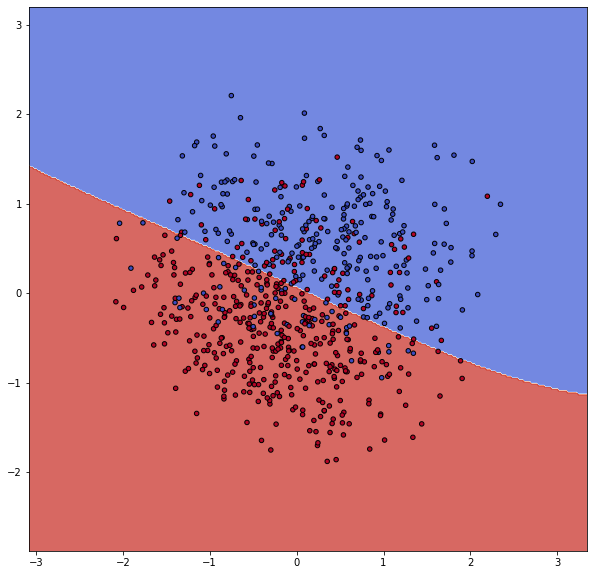

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### Алгоритм логической регрессии:

**Это алгоритм классификации машинного обучения, используемый для прогнозирования вероятности категориальной зависимой переменной. В логистической регрессии зависимая переменная является бинарной переменной, содержащей данные, закодированные как 1 (да, успех и т.п.) или 0 (нет, провал и т.п.).**
Другими словами, модель логистической регрессии предсказывает P(Y=1) как функцию X.

##### Условия логистической регрессии:
    1. Бинарная логистическая регрессия требует, чтобы зависимая переменная также была бинарной.
    2. Для бинарной регрессии фактор уровня 1 зависимой переменной должен представлять желаемый вывод.
    3. Использоваться должны только значимые переменные.
    4. Независимые переменные должны быть независимы друг от друга. Это значит, что модель должна иметь малую мультиколлинеарность или не иметь её вовсе.
    5. Независимые переменные связаны линейно с логарифмическими коэффициентами.
    6. Логистическая регрессия требует больших размеров выборки.

Логическая - названа так потому что значения которые принимает эта функция - 0 и 1

In [16]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
Y = number_data_ready_Y
X = number_data_ready_X
with measure_time():
    logisticRegr.fit(X, Y)
    
logisticRegr.score(X,Y)

Потрачено времени 0.027925491333007812 сек


0.9519774011299436

Алгоритм сработал опять менее десятых доль секунд, точность тоже радует: 95% 

(708, 2)


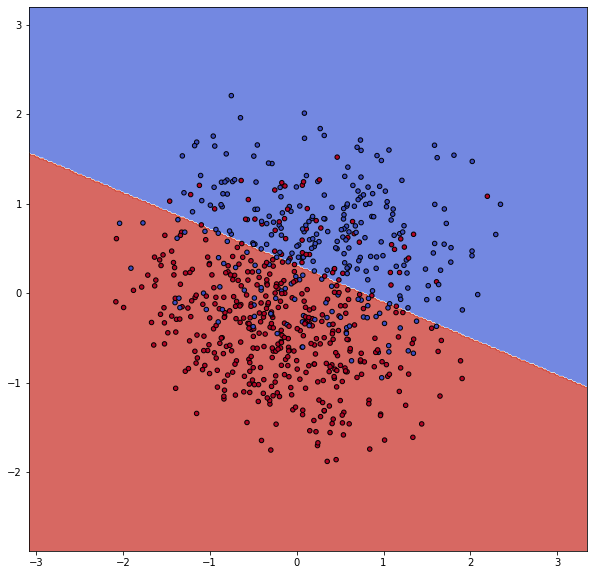

In [17]:
pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: logisticRegr.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

Графически разделение прошло на две половины

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
Y = number_data_ready_Y
X = number_data_ready_X
with measure_time():
    rf.fit(X,Y)
    
rf.score(X,Y)

Потрачено времени 0.026926040649414062 сек


0.998587570621469

Времени было затрачено мало, точность практически 100%

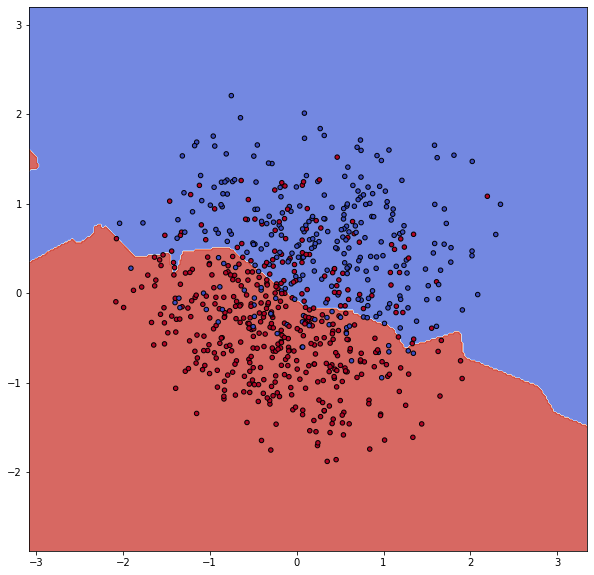

In [19]:
clf_predict = lambda xx, yy: rf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

Установим нужные библиотеки для работы: 

In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


## Алгоритм случайного леса: 

Взято с : https://tproger.ru/translations/python-random-forest-implementation/

**Дерево решений** — интуитивно понятная базовая единица алгоритма случайный лес. Мы можем рассматривать его как серию вопросов да/нет о входных данных. В конечном итоге вопросы приводят к предсказанию определённого класса (или величины в случае регрессии). Это интерпретируемая модель, так как решения принимаются так же, как и человеком: мы задаём вопросы о доступных данных до тех пор, пока не приходим к определённому решению (в идеальном мире).

**Загрязнение Джини** - вероятность неверной маркировки в узле случайно выбранного образца. К примеру, в верхнем (корневом) узле вероятность неверной классификации образца равна 44.4 %. Это можно вычислить с помощью уравнения: 

![](https://s3.tproger.ru/uploads/2019/05/Kartinka4.png)


Загрязнение Джини узла n равно 1 минус сумма отношений класса к общему количеству образцов pi, возведённых в квадрат, для каждого из множества классов J (в нашем случае это всего 2 класса). Звучит сложно, поэтому покажем, как вычисляется загрязнение Джини для корневого узла:

![](https://s3.tproger.ru/uploads/2019/05/Kartinka5.png)

Вызывается тренировка модели и алгоритм строит деревья решений 

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model_test = RandomForestClassifier(n_estimators=10)

# Train
model_test.fit(iris.data, iris.target)
# Extract single tree
estimator = model_test.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='qwe.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

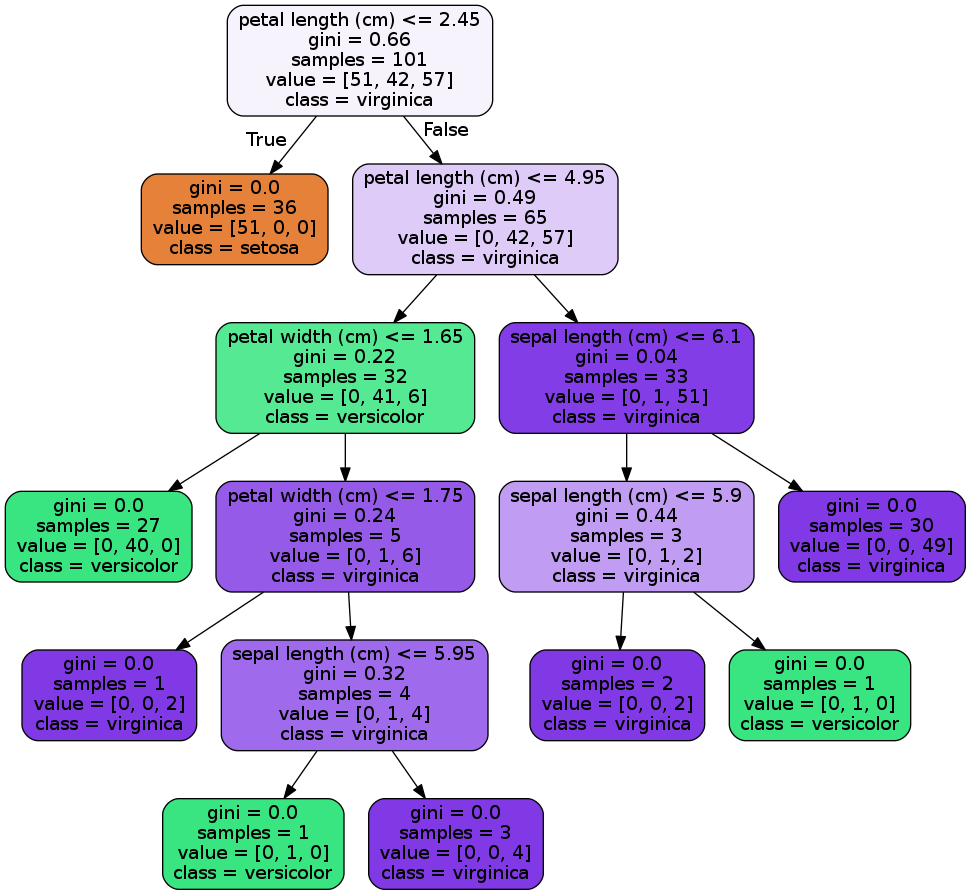

In [24]:
# Convert to png using system command (requires Graphviz)

import pydot

# Display in jupyter notebook
from IPython.display import Image
Image('C:\\Users\\Devil\\qwe.png')

У нас имеется 4 части

### Что обозначают выведенные данные: 

#### True или False (Вопрос о значении параметра образца):
    Ответ может принимать значение True или False. Это точка разделения узла, в зависимости от ответа определяется, в каком направлении вниз по дереву продвинется образец данных.

#### Gini:
    Средневзвешенное загрязнение Джини должно уменьшаться по мере того, как мы движемся вниз по дереву.

#### Samples:
     Количество прошедших через этот узел образцов.

#### Value: 
    Отношение классов, прошедших через этот узел, выраженное в абсолютных числах.
    
#### Class: 
    Класс большинства прошедших через узел образцов. Для листьев это прогнозируемое значение всех попадающих в эти узлы элементов.

    Листья не содержат вопроса, так как являются финальными прогнозируемыми значениями классификации. Чтобы обработать новый элемент набора данных, нужно просто двигаться вниз по дереву, используя параметры элемента для ответов на вопросы. В финале вы доберётесь до одного из листьев, значение Class которого и будет прогнозируемым классом элемента.

    В каждом узле дерево решений ищет такое значение определённого параметра, которое приведёт к максимальному уменьшению загрязнения Джини.

## Случайный лес¶:
    
    Модель, состоящая из множества деревьев решений. Вместо того,чтобы просто усреднять прогнозы разных деревьев (такая концепция называется просто «лес»), эта модель использует две ключевые концепции, которые и делают этот лес случайным.

##### Случайная выборка образцов из набора данных при построении деревьев.
       В процессе тренировки каждое дерево случайного леса учится на случайном образце из набора данных. Выборка образцов происходит с возмещением (в статистике этот метод называется бутстреппинг, bootstrapping). Это даёт возможность повторно использовать образцы одним и тем же деревом.

##### При разделении узлов выбираются случайные наборы параметров.
       Вторая базовая концепция случайного леса заключается в использовании определённой выборки параметров образца для разделения каждого узла в каждом отдельном дереве. Обычно размер выборки равен квадратному корню из общего числа параметров. То есть, если каждый образец набора данных содержит 16 параметров, то в каждом отдельном узле будет использовано 4

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
Y = number_data_ready_Y
X = number_data_ready_X
with measure_time():
    rf.fit(X,Y)
    
rf.score(X,Y)

Потрачено времени 0.022937774658203125 сек


0.9957627118644068

Точность высока, а времени затрачено менее секунды

In [26]:
estimator = rf.estimators_[1]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree2.dot',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

from IPython.display import Image
Image('C:\\Users\\Devil\\tree2.png')

Дерево получилось большим 

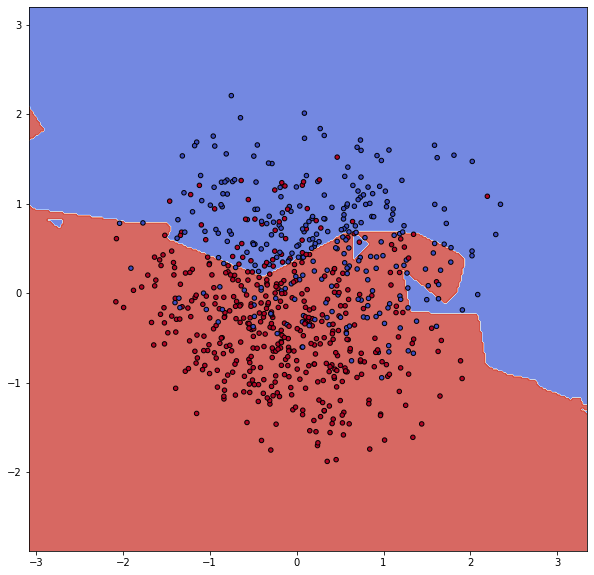

In [27]:
clf_predict = lambda xx, yy: rf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

##### AdaBoostClassifier 
    Cодержит пять параметров из которых 3 наиболее важные
    
   **base_estimator** — базовый алгоритм. По умолчанию используется DecisionTreeClassifier(max_depth=1) - деревья решений
   
   **n_estimators** — максимальное количество оценок, после которого бустинг прекращается. Если произойдет полное совпадение, то закончится раньше.
   
   **learning_rate** - вклад каждой модели в весовые коэффициенты. Значение по умолчанию равно 1. Снижение этого параметра будет означать, что весовые коэффициенты буду увеличиваться или уменьшаться в небольшой степени, вынуждая модель дольше обучаться.

In [28]:
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(learning_rate=0.5)
Y = number_data_ready_Y
X = number_data_ready_X
with measure_time():
    Ada.fit(X,Y)
    
Ada.score(X,Y)

Потрачено времени 0.14239501953125 сек


0.9279661016949152

Алгоритм тратит уже 1 десятую секунды и точность упала, но все равно выше 90%

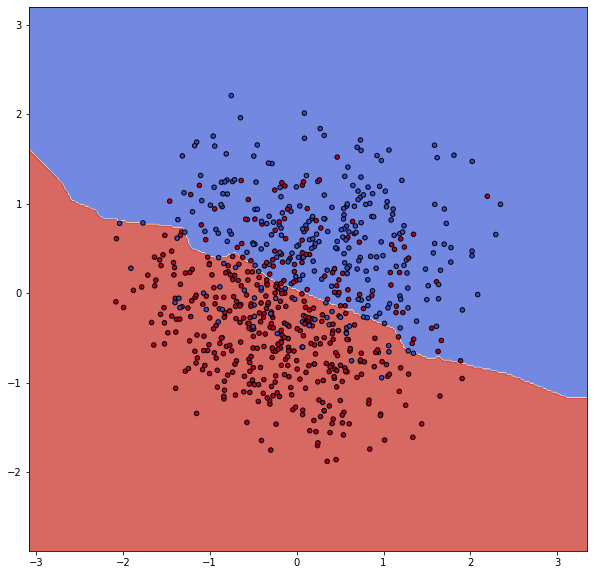

In [29]:
clf_predict = lambda xx, yy: Ada.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

#### MLPClassifier

У него есть несколько важных параметров:
    **activation** {‘identity’, ‘logistic’, ‘tanh’, ‘relu’} по умолчанию выбирается relu - функция активации
    
   **solver**{‘lbfgs’, ‘sgd’, ‘adam’} по умолчанию adam - оптимизатор, для нашего случая советуют использовать lbfgs из-за сравнительно малого количества элементов.
   
   **batch_size** - размер пакета для обучения

In [30]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='lbfgs')
Y = number_data_ready_Y
X = number_data_ready_X
with measure_time():
    classifier.fit(X,Y)
classifier.score(X,Y)

Потрачено времени 0.25331830978393555 сек


1.0

Метод тратит больше времени чем остальные алгоритмя, однако точность у него 100% (удивило), распределение точек визуально равно

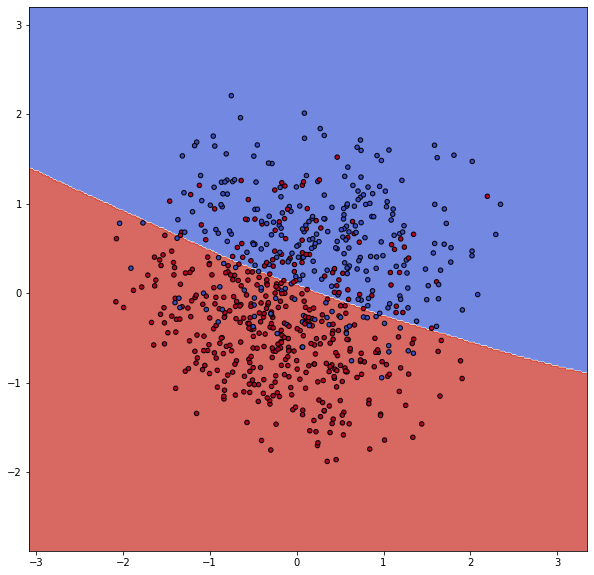

In [31]:
clf_predict = lambda xx, yy: classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

### Keras и tenserflow
       
   Установим нужные библиотеки для дальнейшей работы

In [32]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


Создадим конвеер чтобы увеличивать размерность масссива

In [34]:
class ExpandDims(TransformerMixin, BaseEstimator):
    def __init__(self, axis):
        self.axis = axis
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.expand_dims(X, axis=self.axis)

Для преобразования категорий в понятные для модели числовые данные мы использовали класс **LabelEncoder**. В примере используется другой метод, **OneHotEncoder** - он кодирует метки таким образом, чтобы модель не начала расматривать метки как часть данных и не начала бы искать зависимость там, где ее нет.

Этот кодировщик берёт столбец с категориальными данными, который был предварительно закодирован в признак, и создаёт для него несколько новых столбцов. Числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще.

В нашем случае, не важно какой энкодер использовать, дедь у нас сего два класса.

In [35]:
# Нормализуем данные X
pipe_x = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('norm', preprocessing.MinMaxScaler())
])

# Нормализуем данные Y
pipe_y = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder()),
    ('expand_dims', ExpandDims(axis=1)),
    ('one_hot_encoder', preprocessing.OneHotEncoder(sparse=False))
])

# вызываем препроцессоры
number_data_ready_X = pipe_x.fit_transform(outletless_data_X)
number_data_ready_Y = pipe_y.fit_transform(outletless_data_Y)

print(number_data_ready_X.shape, number_data_ready_Y.shape)

(708, 100) (708, 2)


In [36]:
X_train = number_data_ready_X
Y_train = number_data_ready_Y

In [37]:
number_data_ready_X[:2:], number_data_ready_Y[::2]

(array([[1.        , 0.5       , 0.25      , 0.        , 0.25      ,
         0.25      , 0.        , 1.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.5       ,
         0.        , 0.        , 0.        , 0.        , 1.        ,
         0.75      , 0.25      , 1.        , 0.75      , 0.75      ,
         1.        , 1.        , 0.5       , 0.        , 0.25      ,
         0.        , 1.        , 0.        , 0.5       , 0.5       ,
         0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
         1.        , 0.5       , 0.        , 1.        , 0.5       ,
         0.5       , 1.        , 1.        , 0.        , 0.75      ,
         0.75      , 0.25      , 1.        , 0.75      , 0.75      ,
         0.        , 0.        , 0.75      , 0.25      , 0.25      ,
         1.        , 0.75      , 0.25      , 0.66666667, 0.        ,
         1.        , 0.        , 0.5       , 0.75      , 0.        ,
         0.75      , 1.        , 0

Прописываем структуру нейронной сети

In [38]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

В Keras, мы собираем слои для построения моделей. Модель это (обычно) граф слоев. Наиболее распространенным видом модели является стек слоев: модель tf.keras.Sequential.

Построим простую полносвязную сеть. Использовать будем функцию активации Relu(выпрямитель). ReLu возвращает значение х, если х положительно, и 0 в противном случае. Методом перебора, для моей модели, я определил оптимальное количество слоев и нейронов в слоях, так же определил что данная функция активации в скрытых слоях дает большую точность при обучении.

После описания архитектуры идет этап компиляции.

**tf.keras.Model.compile** принимает три важных аргумента:

***optimizer***: Этот объект определяет процедуру обучения. Передайте в него экземпляры оптимизатора из модуля tf.keras.optimizers, такие как tf.keras.optimizers.Adam или tf.keras.optimizers.SGD.

***loss***: Это функция которая минимизируется в процессе обучения. Среди распространенных вариантов mean square error (mse), categorical_crossentropy, и binary_crossentropy. Функции потерь указываются по имени или по передаче вызываемого объекта из модуля tf.keras.losses.

***metrics***: Используются для мониторинга обучения. Это строковые имена или вызываемые объекты из модуля tf.keras.metrics.

Отобразим шейпы чтобы было понятно от чего плясать

In [39]:
X_train.shape[1]

100

In [40]:
Y_train.shape[1]

2

In [41]:
model = Sequential()
#создадим саму модель и будем добавлять в нее слои. Первый слой пусть содержит 256 нейронов. 
#в каждом следующем слое будет ровно в два раза меньше.
model.add(Dense(256, activation=activations.relu, input_dim=X_train.shape[1])) #input = 100
model.add(Dense(128, activation=activations.relu))
model.add(Dense(64, activation=activations.relu))
model.add(Dense(32, activation=activations.relu))
model.add(Dense(16, activation=activations.relu))
model.add(Dense(8, activation=activations.relu))
model.add(Dense(4, activation=activations.relu))
model.add(Dense(Y_train.shape[1], activation=activations.sigmoid)) # output = 2
model.compile(Adam(), # -тип градиентного спуска
              categorical_crossentropy,  # - функция потерь
              metrics=[categorical_accuracy])

Тренировка сети вызывается методом **fit**. Куда мы передаем данные, метки данных, уровень вывода отладочной информации, количество эпох обучения и пакетный показатель.

In [42]:
model.fit(X_train, 
          Y_train, 
          verbose=2, 
          epochs=100, 
          batch_size=20)

Epoch 1/100
36/36 - 1s - loss: 0.5831 - categorical_accuracy: 0.6709
Epoch 2/100
36/36 - 0s - loss: 0.4099 - categorical_accuracy: 0.8531
Epoch 3/100
36/36 - 0s - loss: 0.2493 - categorical_accuracy: 0.8983
Epoch 4/100
36/36 - 0s - loss: 0.1986 - categorical_accuracy: 0.9266
Epoch 5/100
36/36 - 0s - loss: 0.1998 - categorical_accuracy: 0.9294
Epoch 6/100
36/36 - 0s - loss: 0.2343 - categorical_accuracy: 0.9068
Epoch 7/100
36/36 - 0s - loss: 0.1630 - categorical_accuracy: 0.9407
Epoch 8/100
36/36 - 0s - loss: 0.1546 - categorical_accuracy: 0.9449
Epoch 9/100
36/36 - 0s - loss: 0.1293 - categorical_accuracy: 0.9576
Epoch 10/100
36/36 - 0s - loss: 0.1119 - categorical_accuracy: 0.9661
Epoch 11/100
36/36 - 0s - loss: 0.0887 - categorical_accuracy: 0.9746
Epoch 12/100
36/36 - 0s - loss: 0.1011 - categorical_accuracy: 0.9675
Epoch 13/100
36/36 - 0s - loss: 0.1203 - categorical_accuracy: 0.9520
Epoch 14/100
36/36 - 0s - loss: 0.0626 - categorical_accuracy: 0.9873
Epoch 15/100
36/36 - 0s - los

In [43]:
model.evaluate(X_train, Y_train)

23/23 [==============================] - 0s 2ms/step - loss: 1.3994e-06 - categorical_accuracy: 1.0000


[1.399411985403276e-06, 1.0]

In [44]:
from keras import callbacks #нужна для расширения функционала

Для тренировки сети нужно разделять выборку на тестовую и тренировочную. перед разделением нужно перемешать выборку. далее делим ее в соотношении 80 к 20.

In [45]:
XY_data = np.hstack( (number_data_ready_X, number_data_ready_Y) ).transpose((0,1))
np.random.shuffle(XY_data)

In [46]:
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')

Всего данных: 708
Тренировочных данных: 566
Тестовых данных: 142


In [47]:
X_train = train_data[:, :number_data_ready_X.shape[1] ]
Y_train = train_data[:, number_data_ready_X.shape[1]: ]
print(f'Размер данные для тренировки (входных): {X_train.shape}')
print(f'Размер данные для тренировки (выходных): {Y_train.shape}')

Размер данные для тренировки (входных): (566, 100)
Размер данные для тренировки (выходных): (566, 2)


In [48]:
X_test = test_data[:, :number_data_ready_X.shape[1] ]
Y_test = test_data[:, number_data_ready_X.shape[1]: ]
print(f'Размер данные для теста (входных): {X_test.shape}')
print(f'Размер данные для теста (выходных): {Y_test.shape}')

Размер данные для теста (входных): (142, 100)
Размер данные для теста (выходных): (142, 2)


In [49]:
X_train.shape[1]

100

In [50]:
Y_train.shape[1]

2

Используем ту-же настройку сети что и в прошлый раз

In [51]:
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(256, activation=activations.relu, input_dim=X_train.shape[1])) #input = 100
    model.add(Dense(128, activation=activations.relu))
    model.add(Dense(64, activation=activations.relu))
    model.add(Dense(32, activation=activations.relu))
    model.add(Dense(16, activation=activations.relu))
    model.add(Dense(8, activation=activations.relu))
    model.add(Dense(4, activation=activations.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(Dense(Y_train.shape[1], activation=activations.softmax)) # output = 2
    model.compile(Adam(learning_rate=0.0001), categorical_crossentropy, metrics=[categorical_accuracy])
    return model

In [109]:
model2 = make_nn(X_train.shape[1], Y_train.shape[1])

print('Начинаем обучение сети')
history = model2.fit(
    x=X_train,
    y=Y_train,
    batch_size=10,
    epochs=100,
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети
Epoch 1/100
57/57 [==============================] - 1s 5ms/step - loss: 0.6930 - categorical_accuracy: 0.5605 - val_loss: 0.6720 - val_categorical_accuracy: 0.5986
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6576 - categorical_accuracy: 0.6553 - val_loss: 0.6388 - val_categorical_accuracy: 0.6620
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6316 - categorical_accuracy: 0.6868 - val_loss: 0.5985 - val_categorical_accuracy: 0.6620
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5638 - categorical_accuracy: 0.7225 - val_loss: 0.5054 - val_categorical_accuracy: 0.8310
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4978 - categorical_accuracy: 0.7661 - val_loss: 0.4386 - val_categorical_accuracy: 0.9014
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4876 - categorical_accuracy: 0.7034 - val_loss: 0.3957 - val_categorical_accu

Epoch 50/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2472 - categorical_accuracy: 0.8428 - val_loss: 0.1776 - val_categorical_accuracy: 0.9437
Epoch 51/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2504 - categorical_accuracy: 0.8292 - val_loss: 0.1708 - val_categorical_accuracy: 0.9437
Epoch 52/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2635 - categorical_accuracy: 0.8154 - val_loss: 0.1744 - val_categorical_accuracy: 0.9437
Epoch 53/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2322 - categorical_accuracy: 0.8655 - val_loss: 0.1565 - val_categorical_accuracy: 0.9437
Epoch 54/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2176 - categorical_accuracy: 0.8791 - val_loss: 0.1673 - val_categorical_accuracy: 0.9366
Epoch 55/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2467 - categorical_accuracy: 0.8347 - val_loss: 0.1754 - val_categorical_accuracy: 0.9366
Epoc

57/57 [==============================] - 0s 2ms/step - loss: 0.2586 - categorical_accuracy: 0.8341 - val_loss: 0.1922 - val_categorical_accuracy: 0.9366
Epoch 100/100
57/57 [==============================] - 0s 2ms/step - loss: 0.2613 - categorical_accuracy: 0.8067 - val_loss: 0.1924 - val_categorical_accuracy: 0.9366


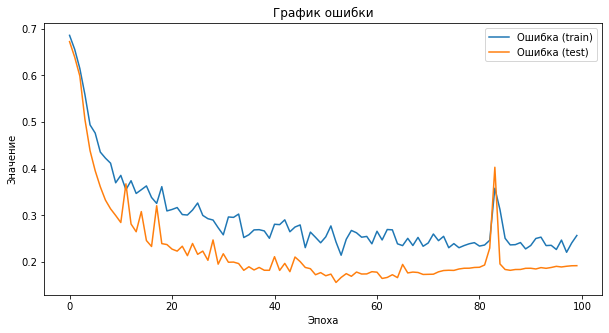

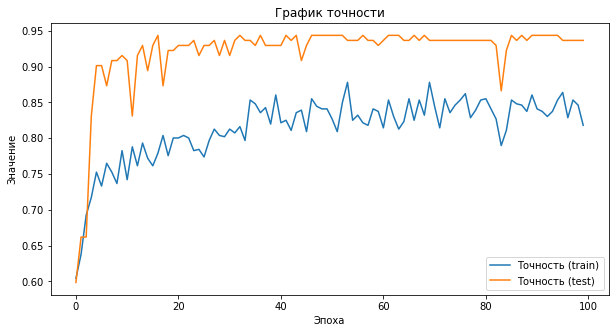

In [110]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

Такой график говорит о переобучении сети. Судя по результатам на 80 эпохе происходит сильный просад точности, но потом все нормализуется, остановим обучение заранее, чтобы не было таких проблем

In [111]:
model3 = make_nn(number_data_ready_X.shape[1], number_data_ready_Y.shape[1])

print('Начинаем обучение сети')
history3 = model3.fit(
    x=number_data_ready_X,
    y=number_data_ready_Y,
    batch_size=10,
#     Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#             На основе какого значения будет приниматься решеня об остановке
            monitor='val_categorical_accuracy',
#             Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#             Количество эпох в результате которых если значение не изменилось, то произвести остановку
            patience=10,
#             "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.01,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
57/57 [==============================] - 1s 5ms/step - loss: 0.6938 - categorical_accuracy: 0.4696 - val_loss: 0.6925 - val_categorical_accuracy: 0.5704
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6920 - categorical_accuracy: 0.6317 - val_loss: 0.6917 - val_categorical_accuracy: 0.5775
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6906 - categorical_accuracy: 0.6950 - val_loss: 0.6904 - val_categorical_accuracy: 0.5915
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6880 - categorical_accuracy: 0.7436 - val_loss: 0.6883 - val_categorical_accuracy: 0.8028
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6859 - categorical_accuracy: 0.6647 - val_loss: 0.6841 - val_categorical_accuracy: 0.8099
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6784 - categorical_accuracy: 0.7361 - val_loss: 0.6726 - val_categorical_accu

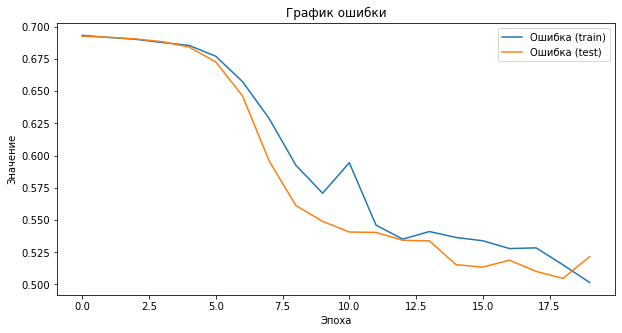

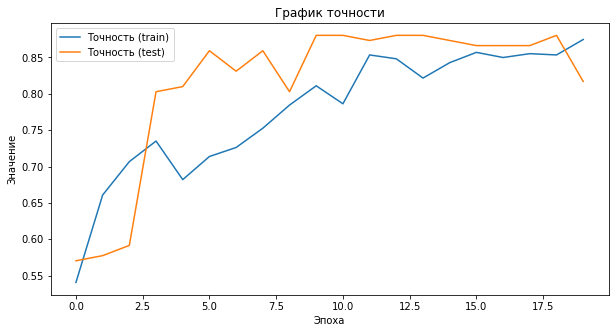

In [112]:
plt.figure(0, figsize=(10,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [113]:
from pathlib import Path
from os import remove
file_name = 'nn_model_loss-{loss:.2f}_val_loss-{val_loss:.2f}_acc-{categorical_accuracy:.2f}_val_acc-{val_categorical_accuracy:.2f}.hdf5'
def make_save_points(name='save_points', file_name=file_name):
#     выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [114]:
print('Начинаем обучение сети')
history = make_nn(X_train.shape[1], Y_train.shape[1]).fit(
    x=X_train,
    y=Y_train,
    batch_size=10,
    epochs=300,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
        callbacks.EarlyStopping(
            monitor='val_categorical_accuracy',
            mode='max',
            patience=50,
            min_delta=0.01
        ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name=file_name),
#             Указываем какое значение отслеживать
            monitor='val_categorical_accuracy',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            period=1,
#             Указываем сторону лучших значений
            mode='max'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками C:\Users\Devil\save_points
Удаляем файл save_points\nn_model_loss-0.37_val_loss-0.42_acc-0.86_val_acc-0.92.hdf5
Удаляем файл save_points\nn_model_loss-0.45_val_loss-0.45_acc-0.74_val_acc-0.91.hdf5
Удаляем файл save_points\nn_model_loss-0.49_val_loss-0.46_acc-0.70_val_acc-0.88.hdf5
Удаляем файл save_points\nn_model_loss-0.49_val_loss-0.47_acc-0.69_val_acc-0.79.hdf5
Удаляем файл save_points\nn_model_loss-0.53_val_loss-0.50_acc-0.65_val_acc-0.74.hdf5
Удаляем файл save_points\nn_model_loss-0.56_val_loss-0.54_acc-0.61_val_acc-0.61.hdf5
Удаляем файл save_points\nn_model_loss-0.69_val_loss-0.68_acc-0.53_val_acc-0.60.hdf5
Epoch 1/300
46/46 [==============================] - 1s 6ms/step - loss: 0.6940 - categorical_accuracy: 0.5797 - val_loss: 0.6926 - val_categorical_accuracy: 0.5965
Epoch 2/300
46/46 [==============================] - 0s 3ms/step - loss: 0.6910 - categorical_accuracy: 0.6824 - val_loss: 0.6887 - val_categorical_acc

46/46 [==============================] - 0s 2ms/step - loss: 0.4037 - categorical_accuracy: 0.8092 - val_loss: 0.2431 - val_categorical_accuracy: 0.9035
Epoch 46/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3952 - categorical_accuracy: 0.7685 - val_loss: 0.2652 - val_categorical_accuracy: 0.9035
Epoch 47/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3747 - categorical_accuracy: 0.8012 - val_loss: 0.2645 - val_categorical_accuracy: 0.9123
Epoch 48/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3690 - categorical_accuracy: 0.8004 - val_loss: 0.2481 - val_categorical_accuracy: 0.9211
Epoch 49/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3779 - categorical_accuracy: 0.7937 - val_loss: 0.2879 - val_categorical_accuracy: 0.9035
Epoch 50/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3694 - categorical_accuracy: 0.8048 - val_loss: 0.2429 - val_categorical_accuracy: 0.9035
Epoch 51/300
46/4

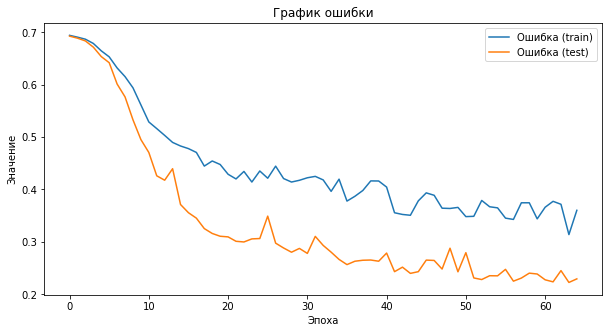

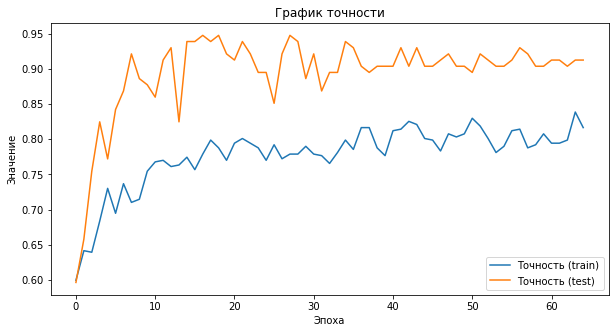

In [115]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [116]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('./save_points/nn_model_loss-0.47_val_loss-0.35_acc-0.78_val_acc-0.95.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)[1]}')
predict = loaded_model.predict_classes(X_test)
predict

18/18 [==============================] - 0s 880us/step - loss: 0.3394 - categorical_accuracy: 0.9470
Точность предсказания на тренировочных данных 0.9469964504241943
5/5 [==============================] - 0s 1ms/step - loss: 0.3799 - categorical_accuracy: 0.8944
Точность предсказания на тестовых данных 0.8943662047386169


array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [117]:
loaded_model.predict(X_train[0].reshape(1,100))

array([[0.5799454 , 0.42005464]], dtype=float32)

Попросим предсказать пол опрашиваемого исходя из имеющихся данных

In [118]:
loaded_model.predict(X_train)

array([[0.57994527, 0.4200547 ],
       [0.22019227, 0.7798077 ],
       [0.32221937, 0.6777806 ],
       ...,
       [0.8471906 , 0.15280934],
       [0.7957697 , 0.20423028],
       [0.43202075, 0.56797934]], dtype=float32)

Затем просто прогоним все значения что-бы посмотреть вероятность определения

(708, 2)


C:\Users\Devil\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


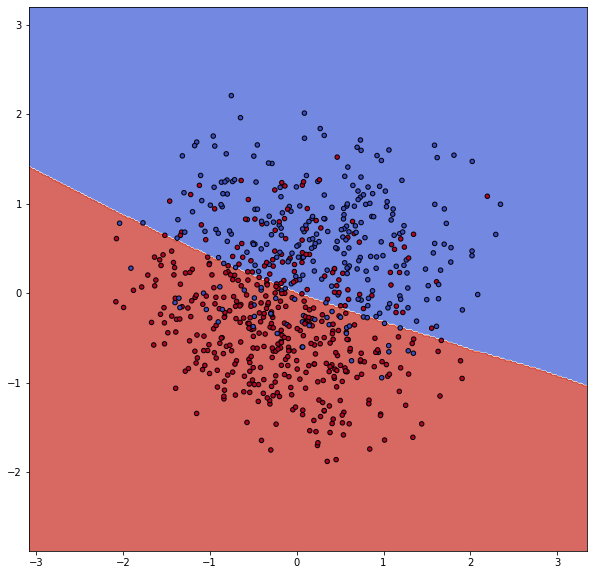

In [119]:
pipe_y_mini = pipeline.Pipeline([
    ('to_matrix', PandasToNumpy()),
    ('label_encoder', ModifyLabelEncoder()),
])


Y = pipe_y_mini.fit_transform(outletless_data_Y)
X = number_data_ready_X

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: model.predict_classes(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

Я рассмотрел различные варианты классификации на примере датасета опроса студентов. В конце построил свою сеть с разным набором параметров, которая с вероятностью 90 % определит пол опрашивемого по опросу